<a href="https://colab.research.google.com/github/vinicius-mattoso/Projeto_Final_DataMining/blob/main/Oversampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Montar o drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# para fazer esse comando funcionar, precisar clicar com o botão direito e fazer
# "add a shourtcut to drive"
%cd /content/drive/My Drive/GRUPO - 02 - BI Master/Projeto DM

/content/drive/My Drive/GRUPO - 02 - BI Master/Projeto DM


In [ ]:
!ls

 Analise_Exploratoria.ipynb
 BASE_LINE.ipynb
 Base_Rj_2019_1_FILTER1.csv
 Base_Rj_2019_1_FULL.csv
 Base_Rj_2019_1_FULL_V0.csv
'Cópia de Projeto_Python_SIH_DG.ipynb'
'Eduardo_Colunas 1 a 30.ipynb'
 Enconde_data_V1.ipynb
 ENSP_Dissertação_Santos_Andréia_Cristina.pdf
'Fontes úteis.gdoc'
 IT_SIHSUS_1603.pdf
 Material_para_analisar.ipynb
'Minuta do relatório.gdoc'
 Oversampling.ipynb
 rj_sih_sus_01_2015.csv
 tree.png
 ViniciciusM_feature_clean_SIH_DG.ipynb


In [ ]:
import pandas as pd
df2=pd.read_csv('Base_Rj_2019_1_FILTER1.csv')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62412 entries, 0 to 62411
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    62412 non-null  int64  
 1   Unnamed: 0.1  62412 non-null  int64  
 2   SEXO          62412 non-null  int64  
 3   UTI_MES_TO    62412 non-null  int64  
 4   MARCA_UTI     62412 non-null  int64  
 5   US_TOT        62412 non-null  float64
 6   DIAG_PRINC    62412 non-null  object 
 7   IDADE         62412 non-null  int64  
 8   DIAS_PERM     62412 non-null  int64  
 9   MORTE         62412 non-null  int64  
 10  CAR_INT       62412 non-null  int64  
 11  NUM_FILHOS    62412 non-null  int64  
 12  CONTRACEP1    62412 non-null  int64  
 13  CONTRACEP2    62412 non-null  int64  
 14  COMPLEX       62412 non-null  int64  
 15  RACA_COR      62412 non-null  int64  
 16  VAL_SH_FED    62412 non-null  float64
 17  VAL_SP_FED    62412 non-null  float64
 18  VAL_SH_GES    62412 non-nu

In [ ]:
df2=df2.drop(columns=['Unnamed: 0','Unnamed: 0.1','VAL_SH_GES','VAL_SP_GES'])

# Convertendo para int as variaveis do tipo object
df2['TPDISEC7']=df2['TPDISEC7'].astype(str).astype(int)
df2['TPDISEC6']=df2['TPDISEC6'].astype(str).astype(int)
df2['TPDISEC5']=df2['TPDISEC5'].astype(str).astype(int)
df2['TPDISEC4']=df2['TPDISEC4'].astype(str).astype(int)
df2['TPDISEC3']=df2['TPDISEC3'].astype(str).astype(int)
df2['TPDISEC2']=df2['TPDISEC2'].astype(str).astype(int)
df2['TPDISEC1']=df2['TPDISEC1'].astype(str).astype(int)
from sklearn import preprocessing

LABEL_ENCODING_DIAG1 = preprocessing.LabelEncoder()
LABEL_ENCODING_DIAG2 = preprocessing.LabelEncoder()
LABEL_ENCODING_DIAG3 = preprocessing.LabelEncoder()
LABEL_ENCODING_DIAG4 = preprocessing.LabelEncoder()
LABEL_ENCODING_DIAG5 = preprocessing.LabelEncoder()
LABEL_ENCODING_DIAG6 = preprocessing.LabelEncoder()
LABEL_ENCODING_DIAG7 = preprocessing.LabelEncoder()

df2['DIAGSEC1']=LABEL_ENCODING_DIAG1.fit_transform(df2['DIAGSEC1'])
df2['DIAGSEC2']=LABEL_ENCODING_DIAG2.fit_transform(df2['DIAGSEC2'])
df2['DIAGSEC3']=LABEL_ENCODING_DIAG3.fit_transform(df2['DIAGSEC3'])
df2['DIAGSEC4']=LABEL_ENCODING_DIAG4.fit_transform(df2['DIAGSEC4'])
df2['DIAGSEC5']=LABEL_ENCODING_DIAG5.fit_transform(df2['DIAGSEC5'])
df2['DIAGSEC6']=LABEL_ENCODING_DIAG6.fit_transform(df2['DIAGSEC6'])
df2['DIAGSEC7']=LABEL_ENCODING_DIAG7.fit_transform(df2['DIAGSEC7'])

LABEL_ENCODING_DIAG_PRINC = preprocessing.LabelEncoder()
df2['DIAG_PRINC']=LABEL_ENCODING_DIAG_PRINC.fit_transform(df2['DIAG_PRINC'])

In [ ]:
from sklearn.model_selection import train_test_split 
# Agora usaremos a função para fazer de fato a separação. Já faremos a separação em treino e teste e entrada e saída.
X = df2.loc[:,df2.columns != 'MORTE']  # Entrada
y = df2.MORTE    # Saída
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    stratify=y)

In [ ]:
y.sum()

4257

In [ ]:
MORTOS_NOVOS=y.sum()
VIVOS_NOVOS=len(y)-MORTOS_NOVOS

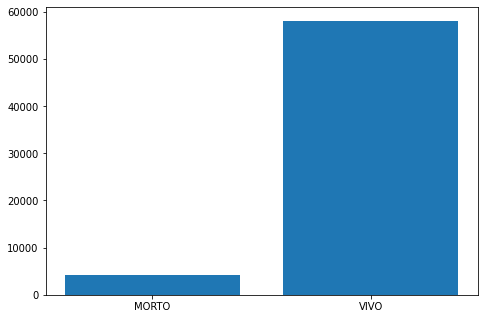

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['MORTO', 'VIVO']
students = [MORTOS_NOVOS,VIVOS_NOVOS]
ax.bar(langs,students)
plt.show()

## OverSampling

In [ ]:
!sudo pip install imbalanced-learn

In [ ]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.1


In [ ]:
from imblearn.over_sampling import RandomOverSampler
# Instanciar o random over sampler
#   e definir que vamos aumentar até ficar 1 morto para cada 2 vivos
oversample = RandomOverSampler(sampling_strategy=0.5)

# Aplicar o fit_resample em nossa base de dados
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
y_over.sum()

29077

In [ ]:
MORTOS_NOVOS=y_over.sum()
VIVOS_NOVOS=len(y_over)-MORTOS_NOVOS

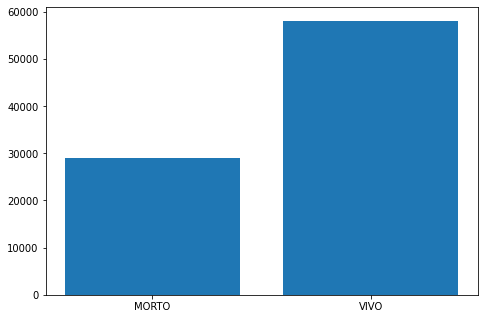

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['MORTO', 'VIVO']
students = [MORTOS_NOVOS,VIVOS_NOVOS]
ax.bar(langs,students)
plt.show()

## New Train Test Division

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_over, 
                                                    y_over, 
                                                    test_size=0.2, 
                                                    stratify=y_over)

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [ ]:
def train_DTC(X_train, y_train, seed):
  model_DTC = DecisionTreeClassifier(random_state=seed) # tente mudar parâmetro para evitar overfitting
  model_DTC.fit(X_train, y_train);
  return model_DTC

seed=200
model_DTC = train_DTC(X_train_2, y_train_2, seed)

In [ ]:
# profundidade da árvore
model_DTC.get_depth()

36

In [ ]:
model_DTC

DecisionTreeClassifier(random_state=200)

In [ ]:
from sklearn import tree
tree.plot_tree(model_DTC)
plt.show()

Resultados de Treino
Acurácia:  0.9998853621838504
Kappa:  0.9997420833942013
F1:  0.9998280679131744


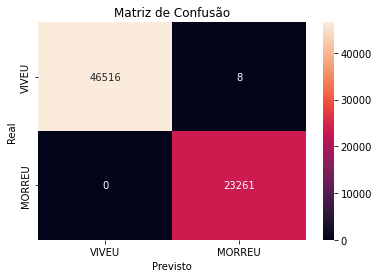

Resultados de Teste
Acurácia:  0.9704820312947785
Kappa:  0.9350192562442665
F1:  0.9575957184026349


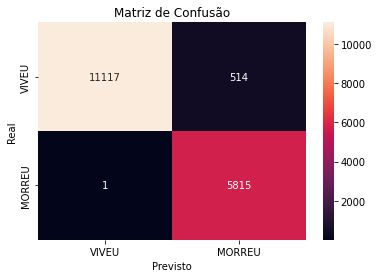

In [ ]:
def predict_and_evaluate(model, X_test, y_test):

  # inferência do teste
  y_pred = model.predict(X_test) 

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred)
  print('F1: ', f1)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_test, y_pred)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Previsto')
  plt.ylabel('Real')
  plt.title('Matriz de Confusão')


    # Colocar os nomes
  ax.xaxis.set_ticklabels(['VIVEU', 'MORREU']) 
  ax.yaxis.set_ticklabels(['VIVEU', 'MORREU'])
  plt.show()

  # CHAMANDO A FUNCAO CRIADA EM CIMA

print('Resultados de Treino')
predict_and_evaluate(model_DTC, X_train_2, y_train_2)
print('Resultados de Teste')
predict_and_evaluate(model_DTC, X_test_2, y_test_2)

### SVM model

In [ ]:
# treinar modelo
from sklearn.svm import SVC

def train_SVM(X_train, y_train, seed):
  model_SVM = SVC(random_state=seed)  # criar o modelo com parametros default
  model_SVM.fit(X_train, y_train)     # treino o modelo com parametros default
  return model_SVM
seed=200
model_SVM = train_SVM(X_train_2, y_train_2, seed)

In [ ]:
print('Resultados de Treino')
predict_and_evaluate(model_SVM, X_train_2, y_train_2)

print('Resultados de Teste')
predict_and_evaluate(model_SVM, X_test_2, y_test_2)

## Random Forest Classifier

In [ ]:
# treinar modelo
from sklearn.ensemble import RandomForestClassifier

def train_RFC(X_train, y_train, seed):
  model_RFC = RandomForestClassifier( random_state=seed) # criar o modelo com parametros default
  model_RFC.fit(X_train, y_train);                       # treino o modelo com parametros default
  return model_RFC

model_RFC = train_RFC(X_train_2, y_train_2, seed)

Resultados de Treino
Acurácia:  0.9998853621838504
Kappa:  0.9997420833942013
F1:  0.9998280679131744


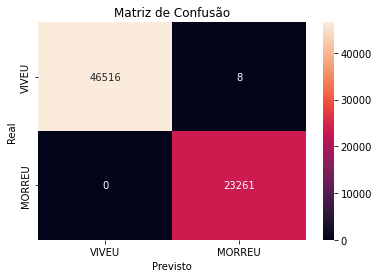

Resultados de Teste
Acurácia:  0.9864160027511893
Kappa:  0.9697270423212747
F1:  0.9800084352593842


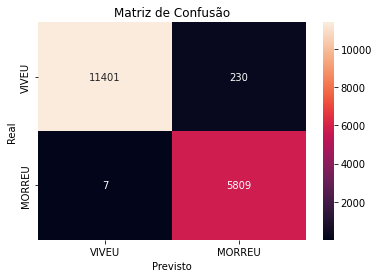

In [ ]:
print('Resultados de Treino')
predict_and_evaluate(model_RFC, X_train_2, y_train_2)
print('Resultados de Teste')
predict_and_evaluate(model_RFC, X_test_2, y_test_2)

### Normalization of the Train data

In [ ]:
X_train_2.head(2)

,SEXO,UTI_MES_TO,MARCA_UTI,US_TOT,DIAG_PRINC,IDADE,DIAS_PERM,CAR_INT,NUM_FILHOS,CONTRACEP1,...,DIAGSEC5,DIAGSEC6,DIAGSEC7,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7
60481,1,0,0,53.43,3140,31,2,2,0,0,...,64,28,13,2,0,0,0,0,0,0
7736,3,0,0,139.30,998,48,2,2,0,0,...,64,28,13,2,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train_2)
X_train_2_norm = scaler.transform(X_train_2)
X_test_2_norm = scaler.transform(X_test_2)

In [ ]:
X_train_2_norm[0][:]

array([-1.11261768, -0.20739423, -0.36823954, -0.36657552,  1.63959145,
       -0.66825482, -0.49796228,  0.46554888, -0.07533751, -0.07896478,
       -0.06307819, -0.24530719, -0.67275289, -0.0793678 , -0.09050855,
       -0.04719934, -0.06443272, -0.51902097,  0.1488157 ,  0.0942404 ,
        0.06357264,  0.04321418,  0.02773258,  0.02001547,  2.3422918 ,
       -0.15288067, -0.09893539, -0.0664143 , -0.04488549, -0.03177785,
       -0.02093228])

## Decision Tree Classifier Normalized

Resultados de Treino
Acurácia:  0.9998853621838504
Kappa:  0.9997420833942013
F1:  0.9998280679131744


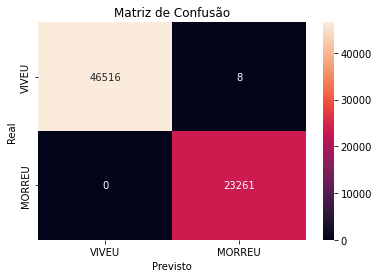

Resultados de Teste
Acurácia:  0.9703673984066028
Kappa:  0.9347723899937403
F1:  0.9574380505474603


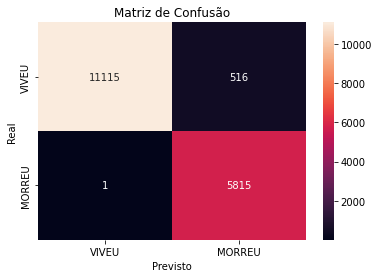

In [ ]:
# Treinar e Testar novamente
model_DTC = train_DTC(X_train_2_norm, y_train_2, seed)
print('Resultados de Treino')
predict_and_evaluate(model_DTC, X_train_2_norm, y_train_2)
print('Resultados de Teste')
predict_and_evaluate(model_DTC, X_test_2_norm, y_test_2)

SVM Normalized

Resultados de Treino
Acurácia:  0.8287740918535502
Kappa:  0.6093321714546549
F1:  0.7358461368409418


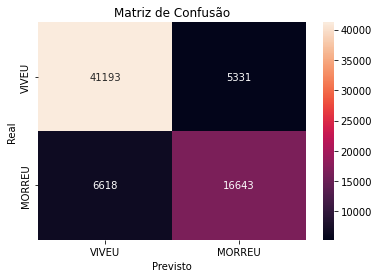

Resultados de Teste
Acurácia:  0.8305725912764372
Kappa:  0.6142564131730381
F1:  0.7397429124845922


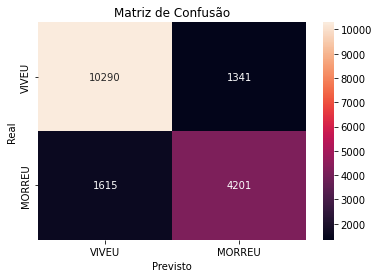

In [ ]:
# Treinar e Testar novamente
model_SVM = train_SVM(X_train_2_norm, y_train_2, seed)
print('Resultados de Treino')
predict_and_evaluate(model_SVM, X_train_2_norm, y_train_2)
print('Resultados de Teste')
predict_and_evaluate(model_SVM, X_test_2_norm, y_test_2)

## Random Forest Classifier Normalized

Resultados de Treino
Acurácia:  0.9998853621838504
Kappa:  0.9997420833942013
F1:  0.9998280679131744


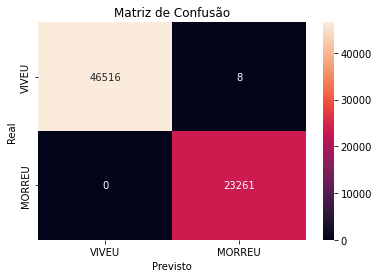

Resultados de Teste
Acurácia:  0.9864160027511893
Kappa:  0.9697270423212747
F1:  0.9800084352593842


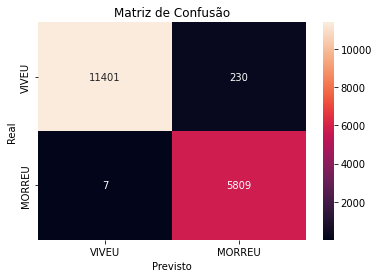

In [ ]:
# Treinar e Testar novamente
model_RFC = train_RFC(X_train_2_norm, y_train_2, seed)
print('Resultados de Treino')
predict_and_evaluate(model_RFC, X_train_2_norm, y_train_2)
print('Resultados de Teste')
predict_and_evaluate(model_RFC, X_test_2_norm, y_test_2)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir parâmetros a serem utilizados
# tuned_parameters = [{'n_estimators': [20, 50, 100, 150, 200, 300, 400, 500],
#                      'max_features': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
#                      'min_samples_leaf': [1, 3, 5, 8, 10]}]

from sklearn.model_selection import GridSearchCV

#dicionario com os parametros de tunning
tuned_parameters = [{'n_estimators': [50, 100, 150],
                     'max_depth': [30, 50, 80],
                     'criterion':['gini','entropy']}]

# Executar o grid search
model_RFC_GS = GridSearchCV(RandomForestClassifier( random_state=seed),\
                            tuned_parameters, scoring='f1')
model_RFC_GS.fit(X_train_2_norm, y_train_2);

In [ ]:
model_RFC_GS.best_params_

{'criterion': 'gini', 'max_depth': 30, 'n_estimators': 100}

In [ ]:
# treinar o melhor modelo
from sklearn.ensemble import RandomForestClassifier

def train_RFC_best(X_train, y_train, seed):
  model_RFC = RandomForestClassifier( random_state=seed,criterion='gini',\
                                     max_depth= 30, n_estimators= 100) 
  model_RFC.fit(X_train, y_train);                       # treino o modelo com os melhores parametros
  return model_RFC

model_RFC_Best = train_RFC_best(X_train_2_norm, y_train_2, seed)

Resultados de Treino
Acurácia:  0.9998853621838504
Kappa:  0.9997420833942013
F1:  0.9998280679131744


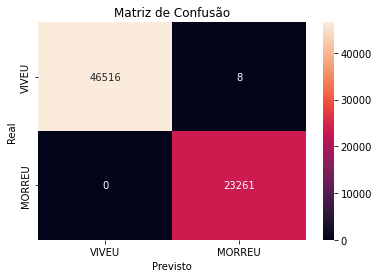

Resultados de Teste
Acurácia:  0.9857282054221356
Kappa:  0.9682077692816657
F1:  0.9790139064475348


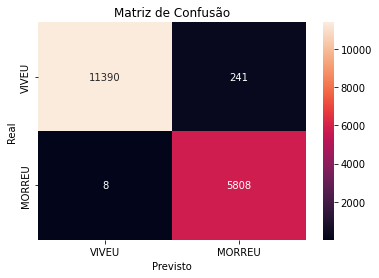

In [ ]:
print('Resultados de Treino')
predict_and_evaluate(model_RFC_Best, X_train_2_norm, y_train_2)
print('Resultados de Teste')
predict_and_evaluate(model_RFC_Best, X_test_2_norm, y_test_2)